# Subplots

Displaying graphs side by side

References



## 1 - Load Data

data from : https://github.com/nickmccullum/python-visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import os
import urllib.request

data_location = '../data/GOOG_MSFT_FB_AMZN_data.csv'
data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/stocks/GOOG_MSFT_FB_AMZN_data.csv'
# data_url = 'https://raw.githubusercontent.com/nicholasmccullum/python-visualization/master/tech_stocks/GOOG_MSFT_FB_AMZN_data.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: ../data/GOOG_MSFT_FB_AMZN_data.csv


In [3]:
stocks = pd.read_csv(data_location)

# cut down data size, it will make graphs render quickly :-)
stocks = stocks.sample(100)

# sort them by time order
stocks.sort_values('Period', ascending = True, inplace = True)
stocks

,Period,Alphabet Inc Price,Amazon.com Inc Price,Facebook Inc Price,Microsoft Corp Price
1254,2015-04-20 00:00:00,533.914405,389.51,83.090,42.905
1252,2015-04-22 00:00:00,537.888496,389.80,84.630,42.985
1241,2015-05-07 00:00:00,530.700000,426.88,78.425,46.700
1237,2015-05-13 00:00:00,529.620000,426.87,78.440,47.625
1210,2015-06-22 00:00:00,538.190000,436.29,84.740,46.230
...,...,...,...,...,...
76,2019-12-18 00:00:00,1352.620000,1784.03,202.500,154.370
74,2019-12-20 00:00:00,1349.590000,1786.50,206.300,157.410
65,2020-01-06 00:00:00,1394.210000,1902.88,212.600,159.030
45,2020-02-04 00:00:00,1447.070000,2049.67,209.830,180.120


## 2 - Start with one graph

<Axes: xlabel='Period', ylabel='Alphabet Inc Price'>

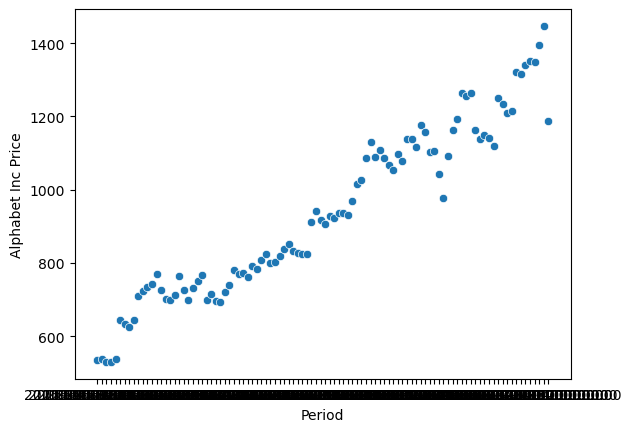

In [4]:
sns.scatterplot(data=stocks, x='Period', y='Alphabet Inc Price')

## 3 - Let's Create a Grid

This is done via  `plt.subplots`

- first argument is number of rows
- second argument is number of columns

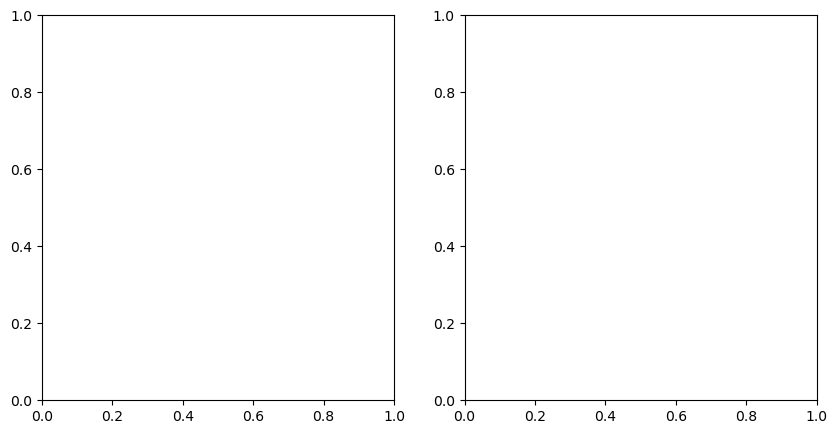

In [5]:
plt.rcParams["figure.figsize"] = (10,5)  # <-- set size

fig, axes = plt.subplots(1, 2)  # <-- row=1, cols=2
plt.show()  # empty plots for now

## 5 - Add plots to the grids

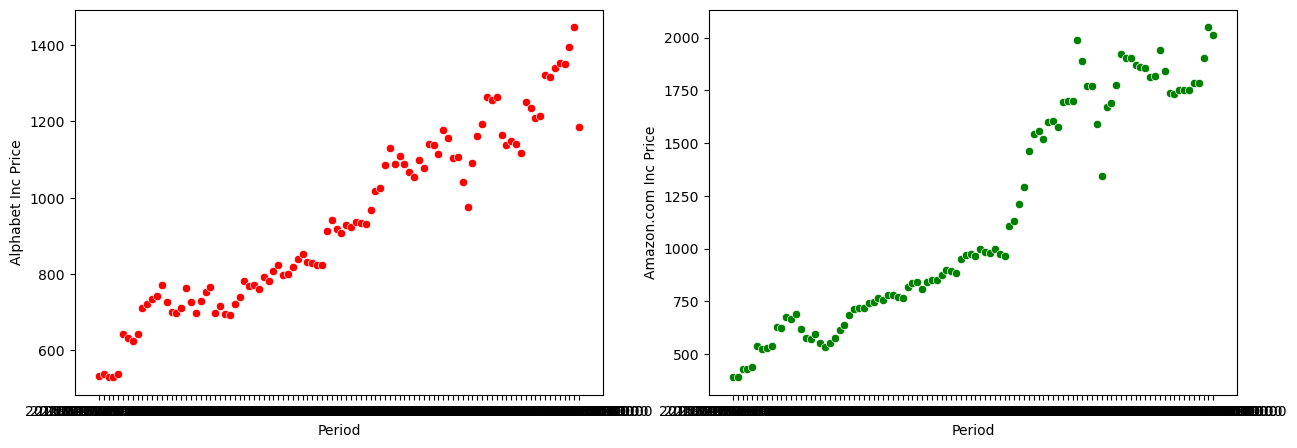

In [6]:
plt.rcParams["figure.figsize"] = (15,5)  # <-- set size

fig, axes = plt.subplots(1, 2)  # <-- row=1,  col=2


sns.scatterplot(data=stocks, x='Period', color="red", y='Alphabet Inc Price', ax=axes[0])
sns.scatterplot(data=stocks, x='Period', color="green", y='Amazon.com Inc Price', ax=axes[1])

plt.show()  # empty plots for now

## TODO
## Once you have both plots showing, adjust subplots to (1,3)
## And display another stock on the third slot, like this
##  sns.scatterplot(data=stocks, x='Period', color="blue", y='Facebook Inc Price', ax=axes[2])

In [7]:
## TODO

## 6 - Stack Vertically

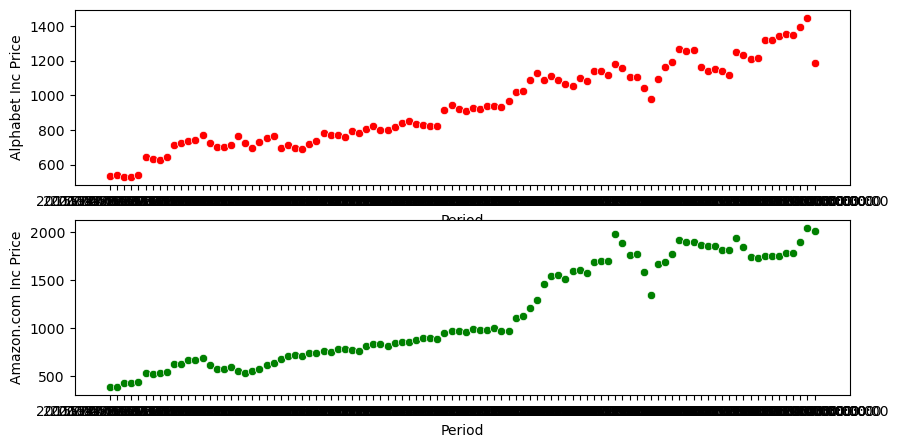

In [8]:
plt.rcParams["figure.figsize"] = (10,5)  # <-- set size

fig, axes = plt.subplots(2, 1)  # <-- row=2,  col=1


sns.scatterplot(data=stocks, x='Period', color="red", y='Alphabet Inc Price', ax=axes[0])
sns.scatterplot(data=stocks, x='Period', color="green", y='Amazon.com Inc Price', ax=axes[1])

plt.show()  # empty plots for now

## 7 - Let's do a 4x4 grid

**Note: how the the axes are referred as 2D array**

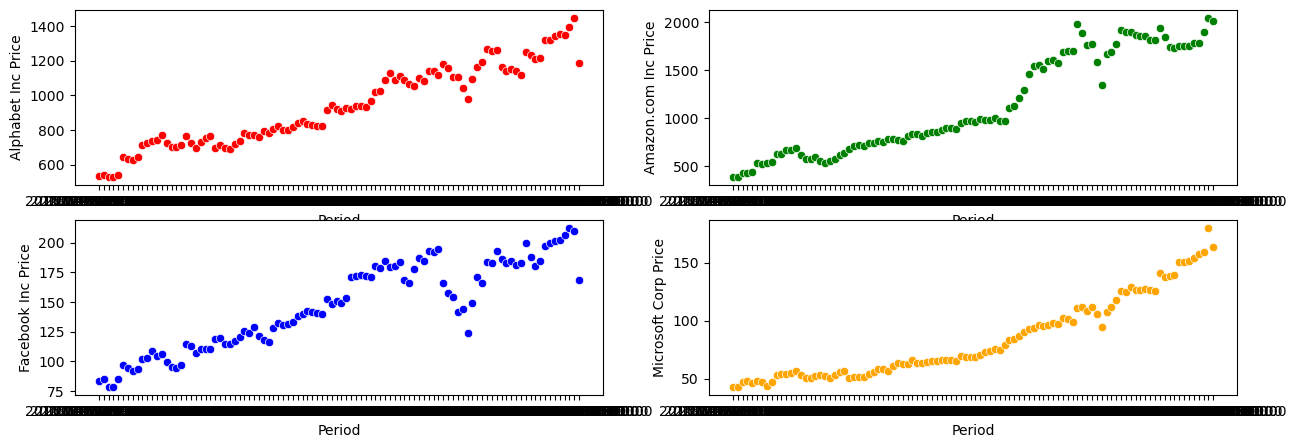

In [9]:
plt.rcParams["figure.figsize"] = (15,5)  # <-- set size

fig, axes = plt.subplots(2, 2)  # <-- row=2,  col=2

sns.scatterplot(data=stocks, x='Period', color="red", y='Alphabet Inc Price', ax=axes[0][0])
sns.scatterplot(data=stocks, x='Period', color="green", y='Amazon.com Inc Price', ax=axes[0][1])
sns.scatterplot(data=stocks, x='Period', color="blue", y='Facebook Inc Price', ax=axes[1][0])
sns.scatterplot(data=stocks, x='Period', color="orange", y='Microsoft Corp Price', ax=axes[1][1])

plt.show()  # empty plots for now

## Exercise

Let's load up some dataset that you are familiar with. And let's compare them side by side


In [10]:
data_location = '../data/Life-Expectancy-Data.csv'

df = pd.read_csv(data_location)
df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
897,Ethiopia,2000,Developing,51.2,391.0,253,0.88,11.594818,NaN,1660,...,55.0,4.36,3.0,5.0,123.876257,66537331.0,11.9,11.8,0.000,3.9
2762,United Kingdom of Great Britain and Northern I...,2015,Developed,81.2,69.0,3,10.66,0.000000,NaN,91,...,96.0,NaN,96.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2089,Republic of Korea,2013,Developing,81.7,68.0,1,9.33,0.000000,99.0,107,...,99.0,7.20,99.0,0.1,NaN,NaN,1.5,1.0,NaN,NaN
1993,Paraguay,2013,Developing,73.8,148.0,3,5.03,573.434698,86.0,0,...,8.0,1.49,86.0,0.2,4479.958580,646574.0,2.0,1.9,0.679,12.3
2467,Sudan,2005,Developing,67.0,261.0,66,1.55,37.590396,22.0,1374,...,78.0,3.18,78.0,0.2,679.753995,3911914.0,NaN,NaN,0.423,6.1
1069,Guatemala,2004,Developing,69.6,21.0,15,2.40,288.401626,NaN,0,...,88.0,6.77,87.0,0.4,1872.737830,12796925.0,1.4,1.4,0.564,9.3
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
1736,Montenegro,2011,Developing,75.4,113.0,0,6.56,666.737437,91.0,5,...,95.0,6.92,95.0,0.1,7318.742449,6279.0,1.9,2.0,0.792,15.1
1140,Honduras,2013,Developing,74.3,15.0,4,3.11,311.755319,97.0,0,...,97.0,9.15,97.0,0.4,2136.773950,8657785.0,2.2,2.1,0.614,11.6
305,Bolivia (Plurinational State of),2014,Developing,74.0,189.0,8,3.62,0.000000,98.0,0,...,99.0,6.33,98.0,0.1,NaN,NaN,1.2,1.1,0.666,13.8


In [11]:
# Let's extra country, year and GDP

df2 = df[['Country', 'Year', 'GDP']]
df2

,Country,Year,GDP
0,Afghanistan,2015,584.259210
1,Afghanistan,2014,612.696514
2,Afghanistan,2013,631.744976
3,Afghanistan,2012,669.959000
4,Afghanistan,2011,63.537231
...,...,...,...
2933,Zimbabwe,2004,454.366654
2934,Zimbabwe,2003,453.351155
2935,Zimbabwe,2002,57.348340
2936,Zimbabwe,2001,548.587312


<Axes: xlabel='Year', ylabel='GDP'>

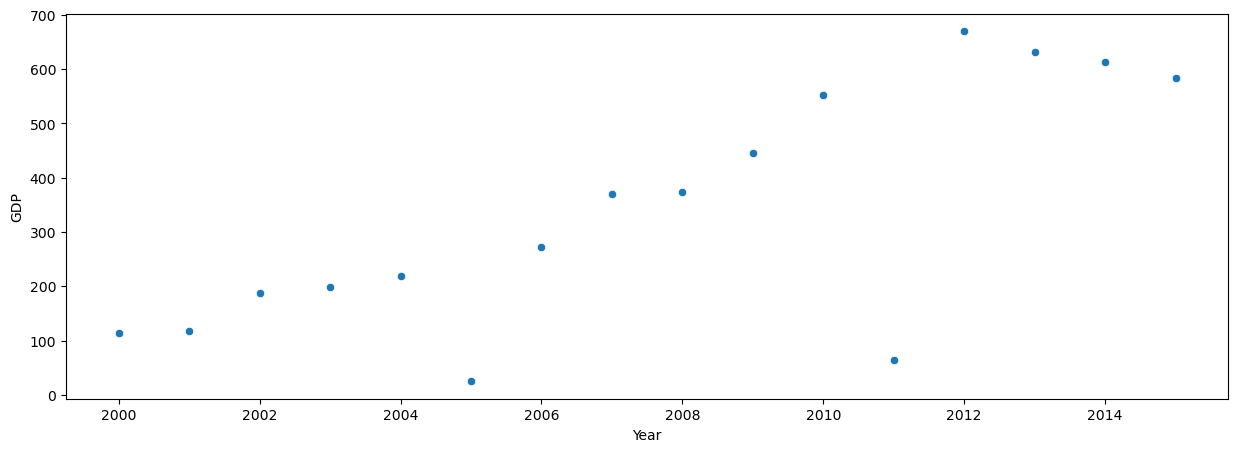

In [12]:
# do a GDP graph like this for a Afghanistan
sns.scatterplot (data=df2.loc[df2['Country'] == 'Afghanistan'] , x='Year', y='GDP')

In [13]:
## TODO-1 : Now select another country and do a plot top/bottom

In [14]:
## TODO-2 : make it a 3x2 plot with 6 countries